In [69]:
# Input bags
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
# whether need standardized
scale = False

In [70]:
# Input data
path='C:\\Users\\YWANG418\\Documents\\Job\\Machine Learning\\Regression\\LR-testSet.csv'
data=pd.read_csv(path,header=None)
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


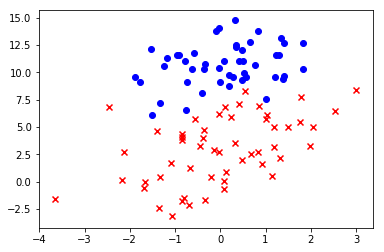

In [71]:
# Split Data
def plot():
    x00=[]
    x10=[]
    x01=[]
    x11=[]
    
    for i in range(len(x)):
        if y[i] == 0:
            x00.append(x.iloc[i,0])
            x10.append(x.iloc[i,1])
        else:
            x01.append(x.iloc[i,0])
            x11.append(x.iloc[i,1])
#Plot
    Scatter0 = plt.scatter(x00,x10,c='b',marker='o')
    Scatter1 = plt.scatter(x01,x11,c='r',marker='x')
plot()
plt.show()


In [72]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
y = y[:,np.newaxis]
X = np.concatenate((np.ones((100,1)),x),axis=1)


In [73]:
# Define Function

def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(sigmoid(xMat * ws)))
    right = np.multiply(1-yMat,np.log(1-sigmoid(xMat * ws)))
    return np.sum(left+right)/-len(xMat)

def GradientDescent(xArr,yArr):
    
    if scale == True:
        xArr=preprocessing.scale(xArr)
    xMat= np.mat(xArr)
    yMat= np.mat(yArr)
    
    lr=0.001
    epochs=10000
    costlist=[]
    m,n=np.shape(xMat)
    
    #set ws
    ws= np.mat(np.ones((n,1)))
    
    for i in range(epochs + 1):
               
        h=sigmoid(xMat * ws)
        ws_grad = xMat.T * (h-yMat)/m
        
        ws=ws- lr* ws_grad
        
        if i % 50==0:
            costlist.append(cost(xArr,yArr,ws))
    return ws, costlist


In [74]:
ws,costlist=GradientDescent(X,y)
print(ws)

[[ 2.05836354]
 [ 0.3510579 ]
 [-0.36341304]]


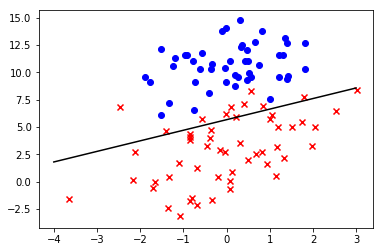

In [75]:
plot()
x_test=[[-4],[3]]
y_test=((-ws[0]-x_test * ws[1])/ ws[2])

plt.plot(x_test,y_test,'k')
plt.show()

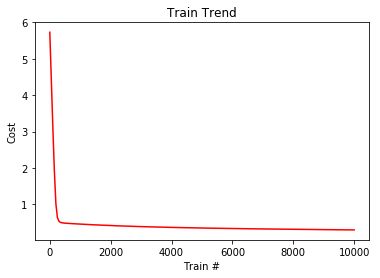

In [76]:
# Plot costlist trend
x= np.linspace(0,10000,201)
plt.plot(x,costlist,'r')
plt.title('Train Trend')
plt.xlabel('Train #')
plt.ylabel('Cost')
plt.show()

In [79]:
def predict(x0,ws):
    if scale == True:
        x= preprocessing.scale(x0)
    xMat = np.mat(x0)
    ws = np.mat(ws)
    return[1 if x>= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions= predict(X,ws)

print(classification_report(y,predictions))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90        47
          1       1.00      0.81      0.90        53

avg / total       0.92      0.90      0.90       100

